In [1]:
from sklearn.datasets import  make_classification
x,y=make_classification(n_classes=2,n_features=2,n_informative=1,n_redundant=0,n_repeated=0,n_samples=100,random_state=41,hypercube=False,n_clusters_per_class=1,class_sep=10)

In [3]:
print(x.shape)
print(y.shape)

(100, 2)
(100,)


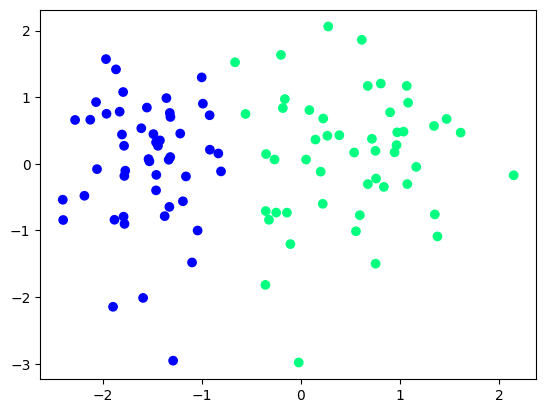

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter")

In [9]:
import numpy as np

In [10]:
def sigmoid(t):
    return 1/(1+ np.exp(-t))

In [19]:
class LogisticRegressionAI():
    def __init__(self,learning_rate,epochs):
        self.learning_rate=learning_rate
        self.epochs=epochs
        self.intercept_=None
        self.slope_=None
        
    def fit(self,x,y):
        x=np.insert(x,0,1,axis=1)
        w_and_b=np.ones(x.shape[1])
        for i in range(self.epochs):
            y_hat=sigmoid(np.dot(x,w_and_b))
            
            w_and_b_slope=np.dot((y-y_hat),x)/x.shape[0]
            w_and_b=w_and_b + self.learning_rate * w_and_b_slope
            
            self.intercept_=w_and_b[0]
            self.slope_=w_and_b[1:]

In [40]:
lra=LogisticRegressionAI(learning_rate=0.5,epochs=5000)

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [16]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(80, 2)
(80,)
(20, 2)
(20,)


In [41]:
lra.fit(x_train,y_train)

In [42]:
print("constat= ",lra.intercept_)
print("coefficient= ",lra.slope_)

constat=  8.363888329413042
coefficient=  [12.62721705  0.89505187]


In [43]:
m= -lra.slope_[0]/lra.slope_[1]
print("m= ",m)

b= -lra.intercept_/lra.slope_[1]
print("b= ",b)

m=  -14.107804737826784
b=  -9.344585031368315


In [44]:
line = m*x_train + b

(-3.0, 2.0)

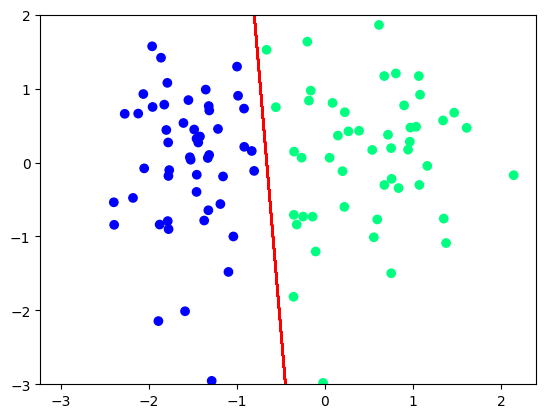

In [47]:
plt.scatter(x[:,0],x[:,1],c=y,cmap="winter")
plt.plot(x_train,line,color="red")
plt.ylim(-3,2)